In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow.keras
tensorflow.keras.__version__

'2.4.0'

In [ ]:
import glob # 파일의 리스트를 뽑을 때 사용
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#fire_dataset 폴더 불러오기

from google.colab import output
# !cp 파일1 파일2 # 파일1을 파일2로 복사 붙여넣기
!cp "/content/drive/MyDrive/data/fire_dataset.zip" "fire_dataset.zip"
# fire_and_smoke.zip을 현재 디렉터리에 압축해제
!unzip "fire_dataset.zip"
output.clear()

In [ ]:
fire_img = glob.glob('fire_dataset/fire_images/*.png')
non_fire_img = glob.glob('fire_dataset/non_fire_images/*.png')

In [ ]:
non_fire_img

['fire_dataset/non_fire_images/non_fire.113.png',
 'fire_dataset/non_fire_images/non_fire.13.png',
 'fire_dataset/non_fire_images/non_fire.179.png',
 'fire_dataset/non_fire_images/non_fire.124.png',
 'fire_dataset/non_fire_images/non_fire.157.png',
 'fire_dataset/non_fire_images/non_fire.73.png',
 'fire_dataset/non_fire_images/non_fire.29.png',
 'fire_dataset/non_fire_images/non_fire.181.png',
 'fire_dataset/non_fire_images/non_fire.186.png',
 'fire_dataset/non_fire_images/non_fire.192.png',
 'fire_dataset/non_fire_images/non_fire.94.png',
 'fire_dataset/non_fire_images/non_fire.56.png',
 'fire_dataset/non_fire_images/non_fire.21.png',
 'fire_dataset/non_fire_images/non_fire.11.png',
 'fire_dataset/non_fire_images/non_fire.189.png',
 'fire_dataset/non_fire_images/non_fire.149.png',
 'fire_dataset/non_fire_images/non_fire.135.png',
 'fire_dataset/non_fire_images/non_fire.120.png',
 'fire_dataset/non_fire_images/non_fire.61.png',
 'fire_dataset/non_fire_images/non_fire.2.png',
 'fire_dat

In [ ]:
print('Number of fire images : {}'.format(len(fire_img)))
print('Number of non fire images : {}'.format(len(non_fire_img)))

Number of fire images : 755
Number of non fire images : 244


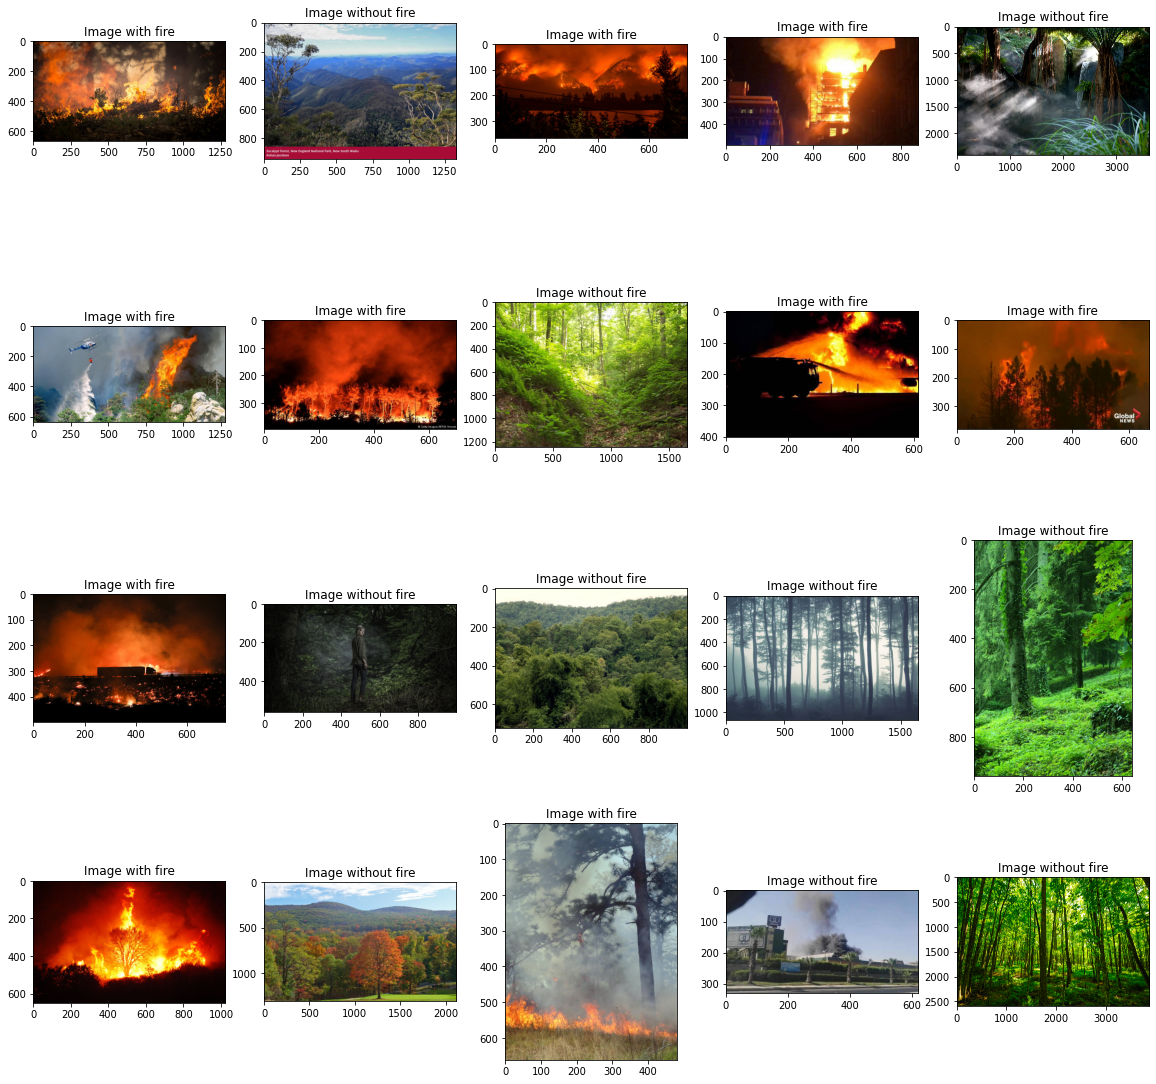

In [ ]:
images_random = random.sample(fire_img, 10) + random.sample(non_fire_img, 10)
random.shuffle(images_random)

plt.figure(figsize = (20, 20))

for i in range(len(images_random)):
  plt.subplot(4, 5, i+1)

  if "non_fire" in images_random[i]:
    img = cv2.imread(images_random[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img, cmap = 'gray')
    plt.title('Image without fire')

  else:
    img = cv2.imread(images_random[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img, cmap = 'gray')
    plt.title('Image with fire')

plt.show()

In [ ]:
fire = []
for x in fire_img:
  fire.append([x, 1])
non_fire = []
for x in non_fire_img:
  non_fire.append([x, 0])
complete = fire + non_fire
random.shuffle(complete)

In [ ]:
df = pd.DataFrame(complete, columns = ['files', 'target'])
df.head(10)

,files,target
0,fire_dataset/fire_images/fire.436.png,1
1,fire_dataset/non_fire_images/non_fire.21.png,0
2,fire_dataset/fire_images/fire.491.png,1
3,fire_dataset/non_fire_images/non_fire.15.png,0
4,fire_dataset/non_fire_images/non_fire.223.png,0
5,fire_dataset/fire_images/fire.357.png,1
6,fire_dataset/fire_images/fire.515.png,1
7,fire_dataset/fire_images/fire.321.png,1
8,fire_dataset/non_fire_images/non_fire.77.png,0
9,fire_dataset/fire_images/fire.735.png,1


In [ ]:
filepath_img = 'fire_dataset/non_fire_images/non_fire.189.png'
df = df.loc[~(df.loc[:, 'files'] == filepath_img), :]

In [ ]:
df.shape

(998, 2)

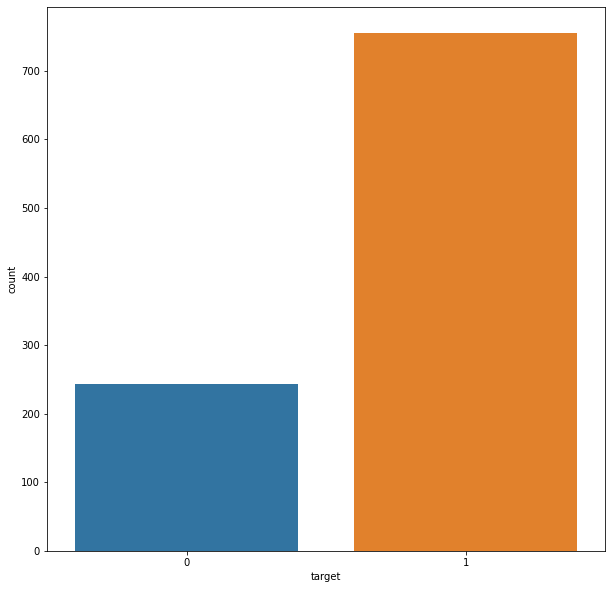

In [ ]:
plt.figure(figsize = (10, 10))

sns.countplot(x = 'target', data = df)
plt.show()

In [ ]:
def preprocessing_image(filepath):
  img = cv2.imread(filepath)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  img = cv2.resize(img, (196, 196))
  img = img / 255
  return img

In [ ]:
def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    X.append(preprocessing_image(f))
    y.append(t)
    
  return np.array(X), np.array(y)


In [ ]:
X, y = create_format_dataset(df)

In [ ]:
X.shape, y.shape

((998, 196, 196, 3), (998,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((698, 196, 196, 3), (300, 196, 196, 3), (698,), (300,))

In [ ]:
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 195, 195, 128)     1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 194, 64)      32832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 97, 97, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 30,batch_size = 32,callbacks = callbacks)

Epoch 1/30
22/22 [==============================] - 180s 8s/step - loss: 1.6988 - accuracy: 0.6958 - val_loss: 0.1944 - val_accuracy: 0.9167
Epoch 2/30
22/22 [==============================] - 184s 8s/step - loss: 0.1872 - accuracy: 0.9410 - val_loss: 0.1950 - val_accuracy: 0.9133
Epoch 3/30
22/22 [==============================] - 187s 9s/step - loss: 0.1792 - accuracy: 0.9338 - val_loss: 0.1114 - val_accuracy: 0.9567
Epoch 4/30
22/22 [==============================] - 180s 8s/step - loss: 0.0894 - accuracy: 0.9712 - val_loss: 0.0929 - val_accuracy: 0.9533
Epoch 5/30
22/22 [==============================] - 179s 8s/step - loss: 0.0829 - accuracy: 0.9678 - val_loss: 0.1046 - val_accuracy: 0.9600
Epoch 6/30
22/22 [==============================] - 178s 8s/step - loss: 0.0658 - accuracy: 0.9809 - val_loss: 0.1597 - val_accuracy: 0.9333
Epoch 7/30
22/22 [==============================] - 179s 8s/step - loss: 0.0395 - accuracy: 0.9889 - val_loss: 0.0885 - val_accuracy: 0.9633
Epoch 8/30
22

In [ ]:
model.save('fire_1.h5')

In [ ]:
from tensorflow.keras.models import load_model

model=load_model('fire_1.h5')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')

In [ ]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

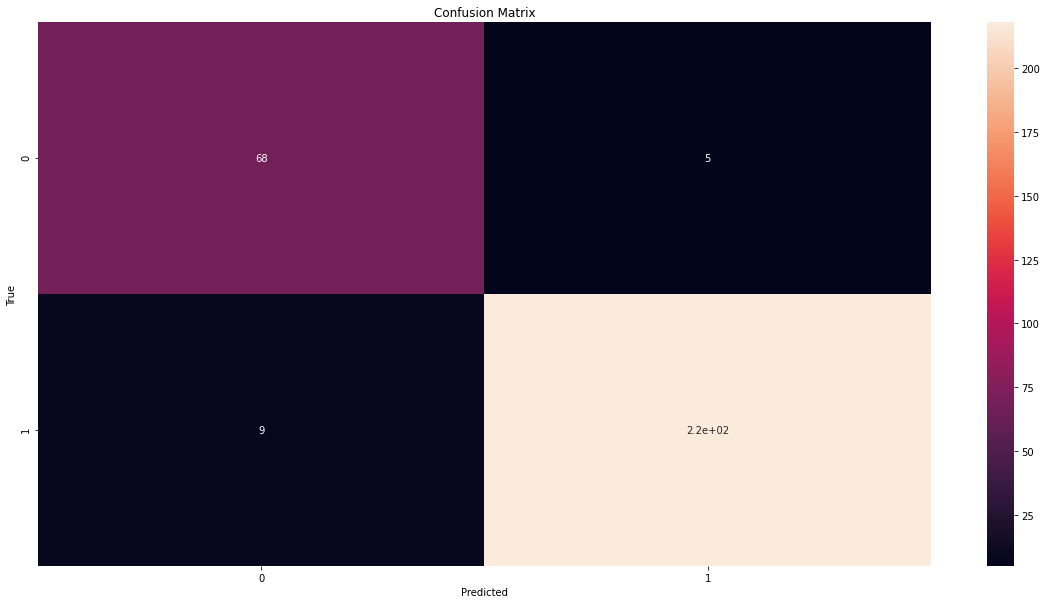

In [ ]:
plt.figure(figsize = (20,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.98      0.96      0.97       227

    accuracy                           0.95       300
   macro avg       0.93      0.95      0.94       300
weighted avg       0.95      0.95      0.95       300

